Hardmard test for calculation of vector inner product. Lets assume there are two states on qubits $ |a \rangle $ and $|b \rangle $ whose values are as below. 

Convert $|a \rangle$ and $|b \rangle$ to be loaded into Unitary 1 and Unitary 2

The steps are below. 
- Prepare qubit 0, in superposition with H. 
- Apply unitary 1 conditionally to load the state 1 into $ |1 \rangle $ branch of qubit 0
- Apply X gate to Qubit 0 to invert the states
- Apply unitary 2 conditionally to load the state 2 into $ |0 \rangle $ branch of qubit 0
- Apply X gate to Qubit 0 to invert the states

The example below is for states |+ \rangle and |- \rangle

In [1]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import *
import math

QC = QuantumCircuit(3,1)

QC.h(0)

Unitary1 = QuantumCircuit(1, name="State 1")
Unitary1.h(0)
Unitary1 = Unitary1.to_gate().control(1)

Unitary2 = QuantumCircuit(1, name="State 2")
Unitary2.x(0)
Unitary2.h(0)
Unitary2 = Unitary2.to_gate().control(1)

state = Statevector(QC)
state.draw(output="Latex")

<IPython.core.display.Latex object>

In [2]:

QC.barrier()
QC.append(Unitary1, [0,1])

state = Statevector(QC)
state.draw(output="Latex")

<IPython.core.display.Latex object>

In [3]:
QC.x(0)
QC.append(Unitary2, [0,1])
QC.x(0)
state = Statevector(QC)
state.draw(output="Latex")

<IPython.core.display.Latex object>

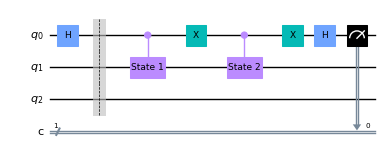

In [4]:
QC.h(0)
QC.measure(0,0)

QC.draw(output="mpl", scale=0.5)

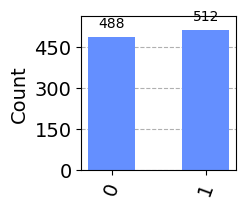

In [5]:
nShots = 1000
backend = Aer.get_backend('aer_simulator_statevector') 
result = backend.run(transpile(QC, backend), shots=nShots).result()
counts = result.get_counts()

plot_histogram(result.get_counts(), figsize=(2,2))

In [6]:
if '0' in counts:
    p0 = counts['0']
else:
    p0 = 0
    
s = 2*(p0/nShots)-1

print("Squared Inner Product:",str(s))

Squared Inner Product: -0.02400000000000002
